<a href="https://colab.research.google.com/github/yejin0455/sesac-ML/blob/main/D05_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
knr.predict([[50]])

array([1033.33333333])

In [ ]:
knr.predict([[50]])[0]

1033.3333333333333

In [ ]:
index = knr.kneighbors([[50]], return_distance=False)
index

array([[34,  8, 14]])

In [ ]:
train_input.shape

(42, 1)

In [ ]:
train_input[index[0]] # fancy indexing

array([[44.],
       [43.],
       [43.]])

In [ ]:
train_input[index[0]].ravel()

array([44., 43., 43.])

In [ ]:
train_target[index[0]] # fancy indexing

array([1000., 1000., 1100.])

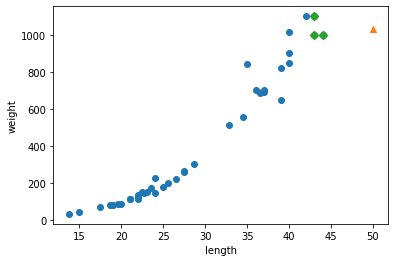

In [ ]:
plt.scatter(train_input[:, 0], train_target)
plt.scatter(50, knr.predict([[50]])[0], marker='^')
plt.scatter(train_input[index[0]].ravel(), train_target[index[0]], marker='D' )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
train_input[:, 0].max()

44.0

In [ ]:
knr.predict([[200]])

array([1033.33333333])

#### numpy ndarray 연습

In [ ]:
arr = np.arange(1, 13).reshape(-1, 3)
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
arr.ndim, arr.shape

(2, (4, 3))

In [ ]:
arr[0]

array([1, 2, 3])

In [ ]:
arr[0, :]

array([1, 2, 3])

In [ ]:
arr[0][:]

array([1, 2, 3])

In [ ]:
arr[:, 0]

array([ 1,  4,  7, 10])

In [ ]:
arr[:, -1]

array([ 3,  6,  9, 12])

In [ ]:
arr.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
arr.ravel()[::-1]

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([39.01714496]), -709.0186449535477)

In [ ]:
lr.coef_ * 50 + lr.intercept_

array([1241.83860323])

In [ ]:
lr.predict([[50]])

array([1241.83860323])

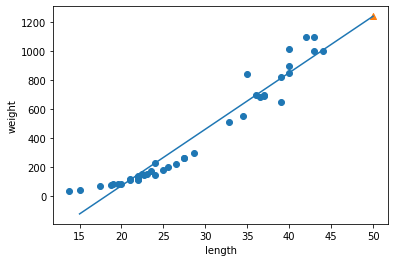

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50]])[0], marker='^')
plt.plot([15, 50], [lr.predict([[15]])[0], lr.predict([[50]])[0]])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
lr.predict([[15]])

array([-123.7614705])

In [ ]:
from sklearn.metrics import r2_score

print(f"train - r^2 score: {r2_score(train_target, lr.predict(train_input))}")
print(f"test - r^2 score: {r2_score(test_target, lr.predict(test_input))}")

train - r^2 score: 0.939846333997604
test - r^2 score: 0.8247503123313558


In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [ ]:
test_poly = np.column_stack((test_input ** 2, test_input))
test_poly[:5]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

In [ ]:
lr.predict([[50**2, 50]])

array([1573.98423528])

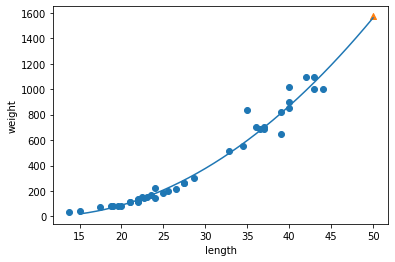

In [ ]:
p = np.arange(15, 51)

plt.scatter(train_input, train_target)
plt.scatter(50, lr.predict([[50**2, 50]]), marker='^')
plt.plot(p, 1.01*(p**2) - 21.6*p + 116)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(f"train - r^2 score: {r2_score(train_target, lr.predict(train_poly))}")
print(f"test - r^2 score: {r2_score(test_target, lr.predict(test_poly))}")

train - r^2 score: 0.9706807451768623
test - r^2 score: 0.9775935108325122
